# Multiple Linear Regression Model

## Bike Sharing Demand Assignment

### Problem Statement:

Built a multiple linear regression model for the prediction of demand for shared bikes.

A US bike-sharing provider <b>BoomBikes</b> has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data


In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing libraries

import numpy as np
import pandas as pd

In [4]:
# Read data
bike_data = pd.read_csv('day.csv')

In [5]:
# Check the head of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike dataframe

In [6]:
# Check the number of rows and columns
bike_data.shape

(730, 16)

In [7]:
# Verify the datatype of variables
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Check the description of the data in the DataFrame
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

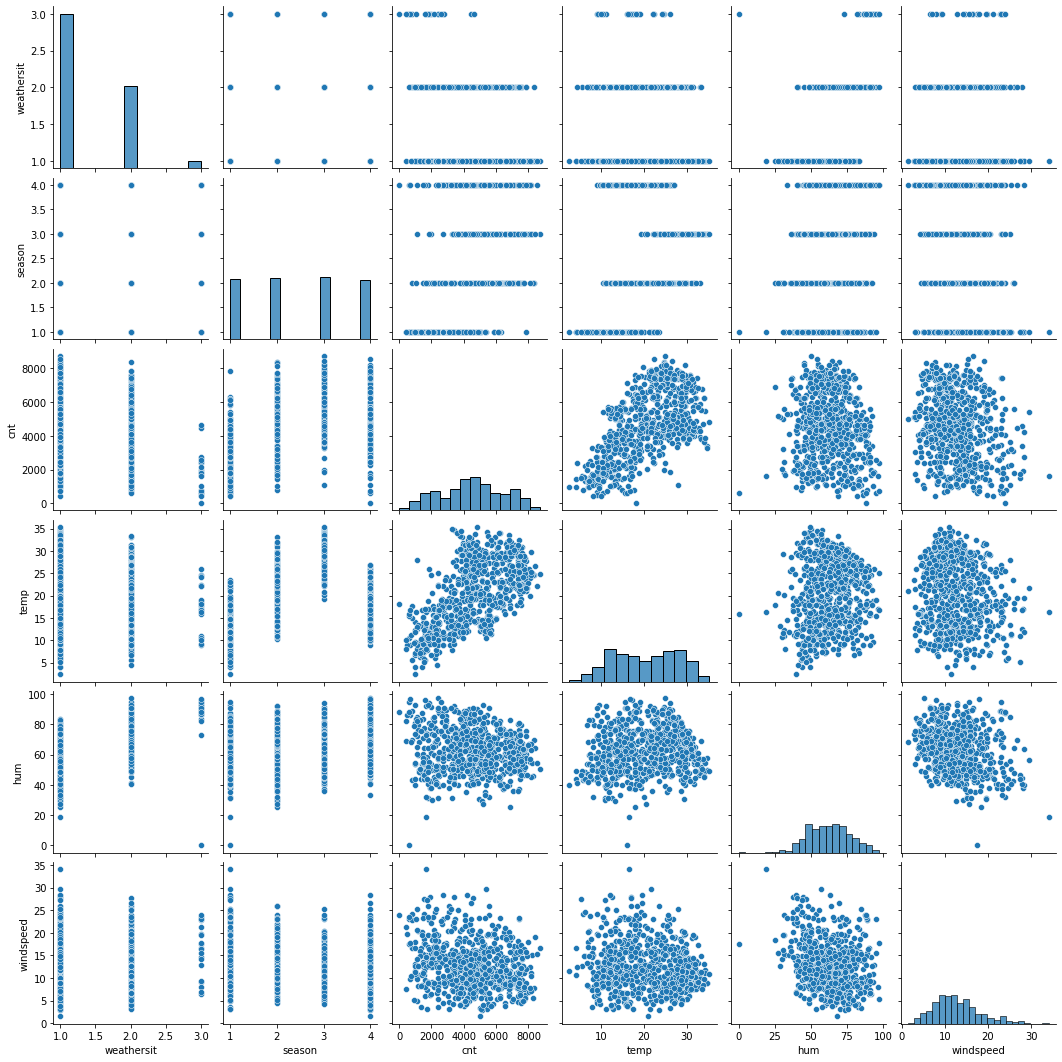

In [10]:
#Let's make a pairplot of all the numeric variables

sns.pairplot(data=bike_data,vars=['weathersit','season','cnt', 'temp', 'hum','windspeed'])
plt.show()

#### Visualising Categorical Variables

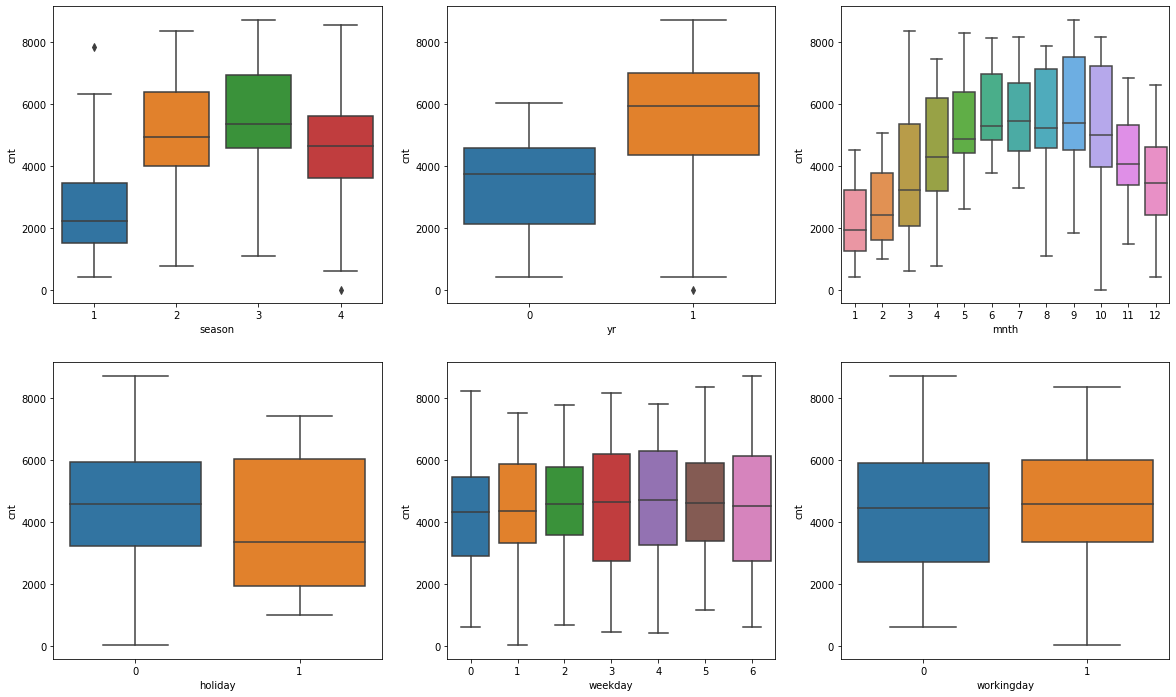

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()

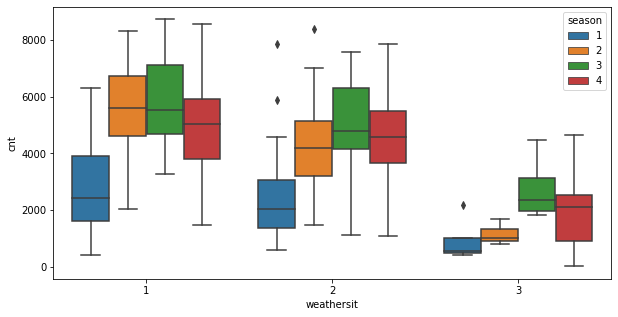

In [12]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'season', data = bike_data)
plt.show()

## Step 3: Data Preparation

In [13]:
# Dropping columns that are irrelevant for the model - 
bike_data.drop(['instant','dteday','casual','registered'],inplace=True, axis = 1)
bike_data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
#Checking if there is any missing value.
bike_data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [15]:
# Converting some numeric values to categorical data
import calendar
bike_data['mnth'] = bike_data['mnth'].apply(lambda x: calendar.month_abbr[x])

In [16]:
# Maping seasons
bike_data.season = bike_data.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [17]:
# Mapping weathersit
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Mist_&_Cloudy', 
                                             3:'Light_Snow_&_Rain',4:'Heavy_Rain_&_Snow'})

In [18]:
bike_data.weekday = bike_data.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday'})

In [19]:
# Check the dataframe now
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist_&_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist_&_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
bike_data.shape

(730, 12)

#### Visualizing the data again after changing the numeric values to their string values

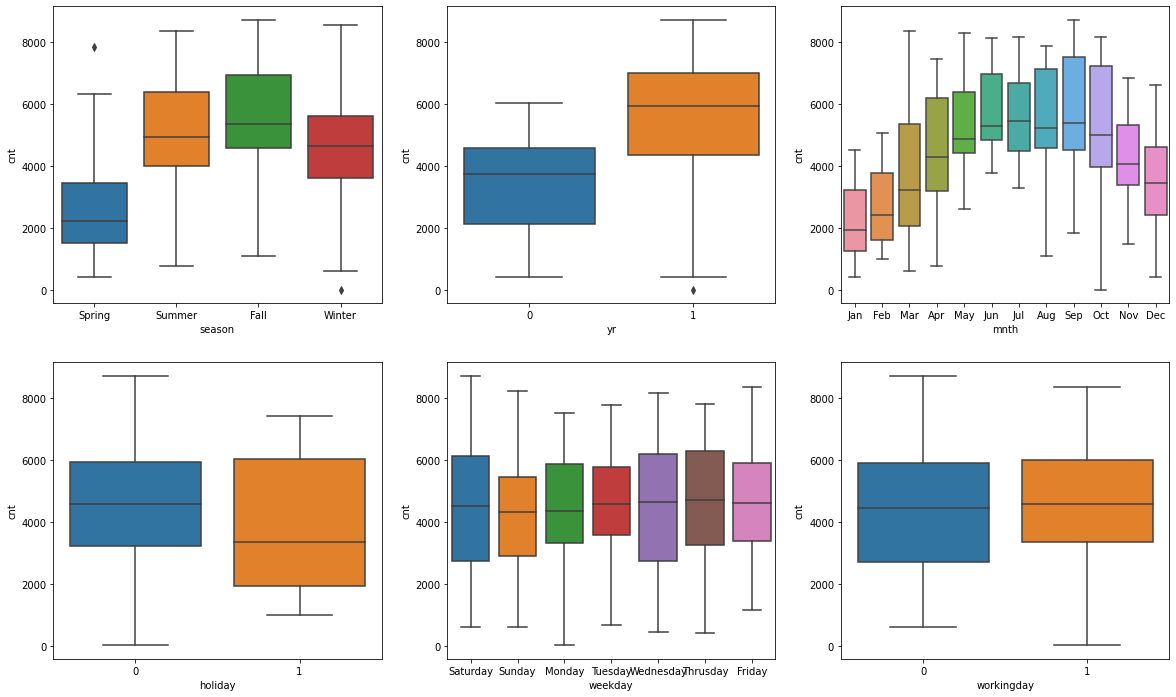

In [23]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()

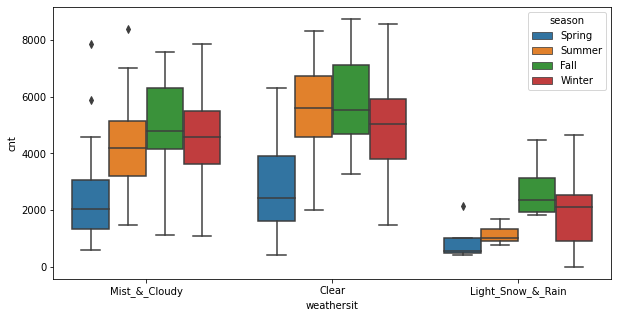

In [22]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'season', data = bike_data)
plt.show()

- The season box plots indicates the count of bike sharing is least for spring
- The more bikes are rent during Fall season
- The number of bike shares incresed in 2019 shown by yr value 1
- The cnt has less values for weather situation - 'Light_Snow_&_Rain' in Spring season and more in 'Clear' weather in Fall season
- The mnth box plots indicates the cnt values increases in Sep month
- The cnt values are less during holidays indicated by workingday boxplot
- The weekday box plots indicates that more bikes are rent during Saturday

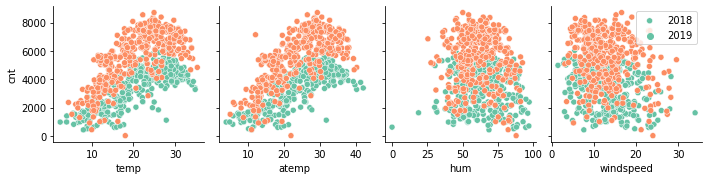

In [26]:
## Checking the impact of year as per the data values

data_value = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike_data, hue='yr', palette='Set2')
data_value._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

### Dummy Variables

In [27]:
## Creating dummy variables for season , mnth ,weathersit ,weekday
dummy = bike_data[['season','mnth','weekday','weathersit']]

In [28]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [29]:
## Adding dummy variables to original dataset
bike_data = pd.concat([dummy,bike_data],axis = 1)

In [30]:
## Check the dataframe values
bike_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist_&_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist_&_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [31]:
## Dropping columns for which dummy variables were created
bike_data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [32]:
bike_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light_Snow_&_Rain,weathersit_Mist_&_Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [33]:
bike_data.shape

(730, 30)

In [34]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    uint8  
 1   season_Summer                 730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_Aug                      730 non-null    uint8  
 4   mnth_Dec                      730 non-null    uint8  
 5   mnth_Feb                      730 non-null    uint8  
 6   mnth_Jan                      730 non-null    uint8  
 7   mnth_Jul                      730 non-null    uint8  
 8   mnth_Jun                      730 non-null    uint8  
 9   mnth_Mar                      730 non-null    uint8  
 10  mnth_May                      730 non-null    uint8  
 11  mnth_Nov                      730 non-null    uint8  
 12  mnth_Oct                      730 non-null    uint8  
 13  mnth_

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [35]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features 

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [37]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [38]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light_Snow_&_Rain,weathersit_Mist_&_Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [39]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light_Snow_&_Rain,weathersit_Mist_&_Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


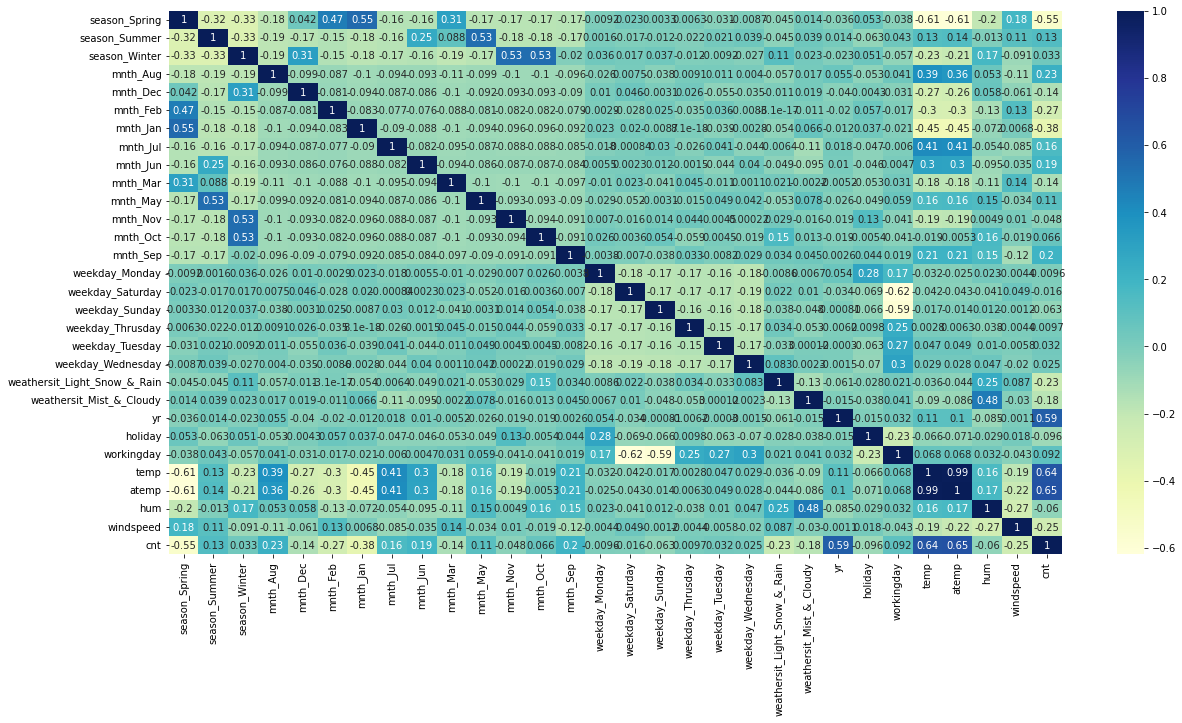

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

By looking at the pair-plot temp and atemp variable has the highest (0.64, 0.65) correlation with target variable 'cnt'.

If we observe temp seems to the correlated to cnt the most. Let's see a pairplot for temp vs cnt

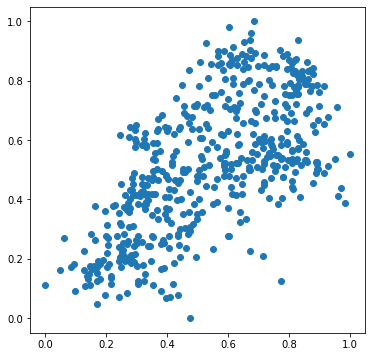

In [42]:
plt.figure(figsize=[6,6])
plt.scatter(train.temp, train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [43]:
y_train = train.pop('cnt')
X_train = train

In [44]:
# Verifying the compatibility of LinearRegression function with Recursive feature elimination
# Checking for 12 variables

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 20)     
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', False, 2),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 2),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 2),
 ('mnth_Jun', False, 2),
 ('mnth_Mar', False, 2),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 2),
 ('weekday_Saturday', False, 2),
 ('weekday_Sunday', False, 2),
 ('weekday_Thrusday', False, 2),
 ('weekday_Tuesday', False, 2),
 ('weekday_Wednesday', False, 2),
 ('weathersit_Light_Snow_&_Rain', True, 1),
 ('weathersit_Mist_&_Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [46]:
# Validating which columns have been selected by RFE
ref_col = X_train.columns[rfe.support_]
ref_col

Index(['season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light_Snow_&_Rain', 'weathersit_Mist_&_Cloudy',
       'yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [47]:
# Verify the eleminated columns
X_train.columns[~rfe.support_]

Index(['season_Summer', 'mnth_Aug', 'mnth_Feb', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'workingday'],
      dtype='object')

In [48]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[ref_col]

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

#### Model1

In [49]:
# Adding a constant variable 

import statsmodels.api as sm

 
X_train_lr = sm.add_constant(X_train_rfe)

In [50]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_lr).fit()

In [51]:
# Check the parameters obtained

lm.params

const                           0.374815
season_Spring                  -0.105128
season_Winter                   0.074267
mnth_Dec                       -0.051503
mnth_Jan                       -0.058020
mnth_Nov                       -0.053796
mnth_Sep                        0.068086
weathersit_Light_Snow_&_Rain   -0.260138
weathersit_Mist_&_Cloudy       -0.057534
yr                              0.232999
holiday                        -0.087785
temp                            0.302013
atemp                           0.087836
hum                            -0.132541
windspeed                      -0.172440
dtype: float64

In [52]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.28e-185
Time:                        15:09:03   Log-Likelihood:                 502.46
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     495   BIC:                            -911.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Checking VIF( Variance Inflation Factor) for multicollinearity

In [56]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculateVIF(df):
    vif = pd.DataFrame()
    X = X_train_lr
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [57]:
calculateVIF(X_train_lr)

,Features,VIF
0,const,63.23
11,temp,52.50
12,atemp,51.70
1,season_Spring,2.73
2,season_Winter,2.36
13,hum,1.89
5,mnth_Nov,1.70
4,mnth_Jan,1.63
8,weathersit_Mist_&_Cloudy,1.57
3,mnth_Dec,1.44


In [58]:
## dropping atemp since it has p > 0.05 and has high VIF 

In [59]:
X_train_new1 = X_train_rfe.drop(['atemp'], axis = 1)

In [60]:
calculateVIF(X_train_new1)

,Features,VIF
0,const,63.23
11,temp,52.50
12,atemp,51.70
1,season_Spring,2.73
2,season_Winter,2.36
13,hum,1.89
5,mnth_Nov,1.70
4,mnth_Jan,1.63
8,weathersit_Mist_&_Cloudy,1.57
3,mnth_Dec,1.44


Rebuilding the model without 'const'

In [61]:
# Adding a constant variable 
X_train_lm1 = sm.add_constant(X_train_new1)

In [62]:
lm1 = sm.OLS(y_train,X_train_lm1).fit()

In [63]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.80e-186
Time:                        15:10:16   Log-Likelihood:                 502.25
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3763      0.032     11.695      0.000       0.313       0.440
season_Spring                   -0.1051      0.016     -6.723      0.000      -0.136      -0.074
season_Winter                    0.0750      0.014      5.219      0.000       0.047       0.103
mnth_Dec                        -0.0518      0.017     -2.959      0.003      -0.086      -0.017
mnth_Jan                        -0.0587      0.018     -3.220      0.001      -0.095      -0.023
mnth_Nov                        -0.0541      0.019     -2.872      0.004      -0.091      -0.017
mnth_Sep                         0.0679      0.016      4.363      0.000       0.037       0.098
weathersit_Light_Snow_&_Rain    -0.2616      0.027     -9.749      0.000      -0.314      -0.209
weathersit_Mist_&_Cloudy        -0.0578      0.011     -5.407      0.000      -0.079      -0.037
yr                               0.2330      0.008     28.261      0.000       0.217       0.249
holiday                         -0.0884      0.026     -3.380      0.001      -0.140      -0.037
temp                             0.3828      0.031     12.311      0.000       0.322       0.444
hum                             -0.1308      0.038     -3.429      0.001      -0.206      -0.056
windspeed                       -0.1753      0.026     -6.702      0.000      -0.227      -0.124
==============================================================================
Omnibus:                       76.262   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.778
Skew:                          -0.739   Prob(JB):                     3.41e-45
Kurtosis:                       5.730   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
calculateVIF(X_train_new1)

,Features,VIF
0,const,63.23
11,temp,52.50
12,atemp,51.70
1,season_Spring,2.73
2,season_Winter,2.36
13,hum,1.89
5,mnth_Nov,1.70
4,mnth_Jan,1.63
8,weathersit_Mist_&_Cloudy,1.57
3,mnth_Dec,1.44


In [65]:
## dropping hum since it has p > 0.05 and has high VIF 

In [66]:
X_train_new2 = X_train_new1.drop(['hum'], axis = 1)

In [67]:
# Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_new2)

Rebuilding the model without 'hum'

In [68]:
lm2 = sm.OLS(y_train,X_train_lm2).fit()

In [69]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.9
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          6.19e-185
Time:                        15:10:22   Log-Likelihood:                 496.28
No. Observations:                 510   AIC:                            -966.6
Df Residuals:                     497   BIC:                            -911.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3066      0.025     12.164      0.000       0.257       0.356
season_Spring                   -0.1070      0.016     -6.774      0.000      -0.138      -0.076
season_Winter                    0.0670      0.014      4.678      0.000       0.039       0.095
mnth_Dec                        -0.0560      0.018     -3.177      0.002      -0.091      -0.021
mnth_Jan                        -0.0623      0.018     -3.389      0.001      -0.098      -0.026
mnth_Nov                        -0.0531      0.019     -2.789      0.005      -0.090      -0.016
mnth_Sep                         0.0640      0.016      4.082      0.000       0.033       0.095
weathersit_Light_Snow_&_Rain    -0.2975      0.025    -11.914      0.000      -0.347      -0.248
weathersit_Mist_&_Cloudy        -0.0789      0.009     -8.948      0.000      -0.096      -0.062
yr                               0.2360      0.008     28.484      0.000       0.220       0.252
holiday                         -0.0893      0.026     -3.378      0.001      -0.141      -0.037
temp                             0.3593      0.031     11.720      0.000       0.299       0.420
windspeed                       -0.1520      0.026     -5.953      0.000      -0.202      -0.102
==============================================================================
Omnibus:                       76.378   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.838
Skew:                          -0.744   Prob(JB):                     9.00e-45
Kurtosis:                       5.708   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
calculateVIF(X_train_new2)

,Features,VIF
0,const,63.23
11,temp,52.50
12,atemp,51.70
1,season_Spring,2.73
2,season_Winter,2.36
13,hum,1.89
5,mnth_Nov,1.70
4,mnth_Jan,1.63
8,weathersit_Mist_&_Cloudy,1.57
3,mnth_Dec,1.44


In [71]:
## dropping mnth_Jan since it has p > 0.05

In [72]:
X_train_new3 = X_train_new2.drop(['mnth_Jan'], axis = 1)

In [73]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new3)

In [74]:
lm3 = sm.OLS(y_train,X_train_lm3).fit()

In [75]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.1
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.16e-183
Time:                        15:10:27   Log-Likelihood:                 490.46
No. Observations:                 510   AIC:                            -956.9
Df Residuals:                     498   BIC:                            -906.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2834      0.025     11.562      0.000       0.235       0.332
season_Spring                   -0.1206      0.015     -7.807      0.000      -0.151      -0.090
season_Winter                    0.0688      0.014      4.755      0.000       0.040       0.097
mnth_Dec                        -0.0426      0.017     -2.453      0.014      -0.077      -0.008
mnth_Nov                        -0.0465      0.019     -2.432      0.015      -0.084      -0.009
mnth_Sep                         0.0646      0.016      4.076      0.000       0.033       0.096
weathersit_Light_Snow_&_Rain    -0.2944      0.025    -11.676      0.000      -0.344      -0.245
weathersit_Mist_&_Cloudy        -0.0799      0.009     -8.970      0.000      -0.097      -0.062
yr                               0.2351      0.008     28.094      0.000       0.219       0.252
holiday                         -0.0909      0.027     -3.402      0.001      -0.143      -0.038
temp                             0.3874      0.030     12.994      0.000       0.329       0.446
windspeed                       -0.1381      0.025     -5.422      0.000      -0.188      -0.088
==============================================================================
Omnibus:                       72.382   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.376
Skew:                          -0.707   Prob(JB):                     2.77e-42
Kurtosis:                       5.647   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [76]:
y_train_cnt = lm3.predict(X_train_lm3)

Text(0.5, 0, 'Errors')

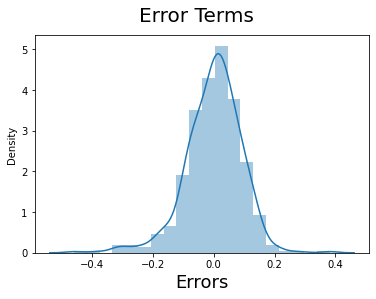

In [77]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)       

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. third model.

#### Applying the scaling on the test sets

In [78]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [79]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light_Snow_&_Rain,weathersit_Mist_&_Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [80]:
y_test = test.pop('cnt')
X_test = test

In [81]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [82]:
# predicting using values used by the final model
test_col = X_train_lm3.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Winter                 219 non-null    uint8  
 3   mnth_Dec                      219 non-null    uint8  
 4   mnth_Nov                      219 non-null    uint8  
 5   mnth_Sep                      219 non-null    uint8  
 6   weathersit_Light_Snow_&_Rain  219 non-null    uint8  
 7   weathersit_Mist_&_Cloudy      219 non-null    uint8  
 8   yr                            219 non-null    int64  
 9   holiday                       219 non-null    int64  
 10  temp                          219 non-null    float64
 11  windspeed                     219 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [83]:
# Making predictions using the fourth model

y_pred = lm3.predict(X_test)

In [85]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8162981444144012

In [86]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.008725068089744662

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

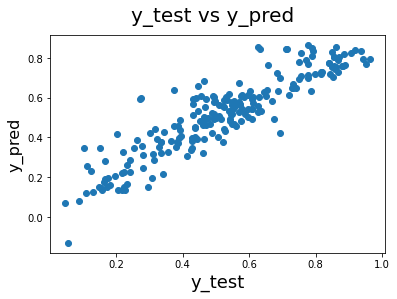

In [87]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)      
plt.ylabel('y_pred', fontsize = 16)      

In [88]:
param = pd.DataFrame(lm3.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param


,Variables,Coefficient value
index,,
10,temp,0.387441
0,const,0.283361
8,yr,0.235068
2,season_Winter,0.068812
5,mnth_Sep,0.064614
3,mnth_Dec,-0.042618
4,mnth_Nov,-0.046525
7,weathersit_Mist_&_Cloudy,-0.079920
9,holiday,-0.090862



We can see that the equation of our best fitted line is:

 cnt = 0.283361 + (0.387441  X  temp) + (0.235068  X  yr) + (0.068812 X season_Winter) + (-0.120573 X season_ Spring) + (0.064614 X mnth_Sep) + (-0.042618 X mnth_Dec) + (-0.046525 X mnth_Nov) + (-0.079920 X weathersit_Mist_&_Cloudy) +  (-0.294417 X weathersit_Light_Snow_&_Rain) + ( -0.090862 X holiday) + ( -0.138057X windspeed)


##### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.

##### All the negative coefficients  indicate that an increase in these values will lead to an decrease in the value of cnt.

- Temp is the most significant with the largest coefficient.
- Followed by weathersit_Light_Snow_&_Rain.
- Bike rentals is more for the month of september
- The rentals reduce during holidays


This indicates that the bike rentals is majorly affected by temperature,season and month.